In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed=1)
X_min = 4
X_max = 30
X_n = 16
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2]
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) + 4 *np.random.randn(X_n)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)

In [2]:
print(X)

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


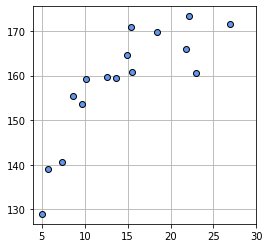

In [3]:
plt.figure(figsize=(4, 4))
plt.plot(X, T, marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

In [36]:
print(np.round(X, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [37]:
print(np.round(T, 2))

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


In [4]:
def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y - t) ** 2)
    return mse

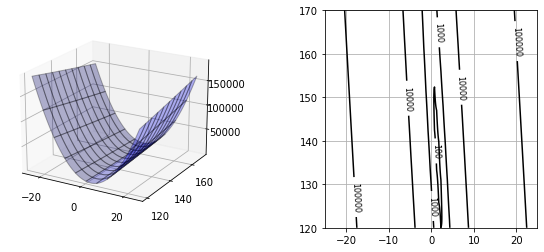

In [5]:
# 리스트 5-1-(6)
from mpl_toolkits.mplot3d import Axes3D

# 평균 제곱 오차 함수
def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y - t) ** 2)
    return mse
    
# 계산
xn = 100 # 등고선 표시 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))

for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
        
# 표시
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3, 
                color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1,2,2)
cont = plt.contour(xx0, xx1, J, 30, colors='black', 
                   levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.show()


In [6]:
def dmse_line(x, t, w):
    y = w[0] * x + w[1]
    d_w0 = 2 * np.mean((y - t) * x)
    d_w1 = 2 * np.mean(y - t)
    return d_w0, d_w1

In [7]:
d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))

[5046.3  301.8]


In [8]:
def fit_line_num(x, t):
    w_init = [10.0, 165.0]
    alpha = 0.001 #학습률
    i_max = 100000 #반복의 최대 횟수
    eps = 0.1 #반복 종료 기울기의 절대값의 한계
    w_i = np.zeros([i_max, 2])
    w_i[0, :] = w_init
    
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i-1])
        w_i[i, 0] = w_i[i - 1, 0] -alpha * dmse[0]
        w_i[i, 1] = w_i[i - 1, 1] -alpha * dmse[1]
        
        if max(np.absolute(dmse)) < eps:
            break
            
        w0 = w_i[i, 0]
        w1 = w_i[i, 1]
        w_i_hist = w_i[: i, :]
        
    return w0, w1, dmse, w_i_hist

반복 횟수 13819
W=[1.539942, 136.176260]
dMSE=[-0.005794, 0.099991]
MSE=49.027462


<Figure size 288x288 with 0 Axes>

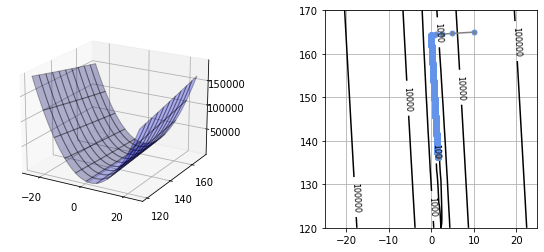

In [9]:
# 메인
plt.figure(figsize=(4, 4))
xn = 100 # 등고선 표시 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))

for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
        
# 표시
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3, 
                color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1,2,2)
cont = plt.contour(xx0, xx1, J, 30, colors='black', 
                   levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)

# 경사하강법 호출
W0, W1, dMSE, W_history = fit_line_num(X, T)

# 결과보기
print('반복 횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))

plt.plot(W_history[:, 0], W_history[:, 1], '.-', color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()

w0=1.540, w1=136.176
mse=49.027 cm^2
SD=7.002 cm


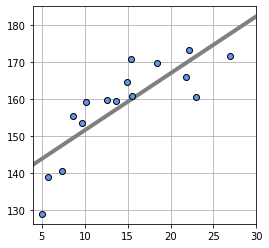

In [10]:
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)
    
plt.figure(figsize=(4,4))
W = np.array([W0, W1])
mse = mse_line(X, T, W)
print("w0={0:.3f}, w1={1:.3f}".format(W0, W1))
print("mse={0:.3f} cm^2".format(mse))
print("SD={0:.3f} cm".format(np.sqrt(mse)))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

In [11]:
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed=1)
X1 = 23 * (T/100) ** 2 + 2 * np.random.randn(X_n)
X1_min = 40
X1_max = 75

In [12]:
print("X0=\n", np.round(X0, 2))
print("X1=\n", np.round(X1, 2))
print("T=\n", np.round(T, 2))

X0=
 [15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
X1=
 [70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
T=
 [170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


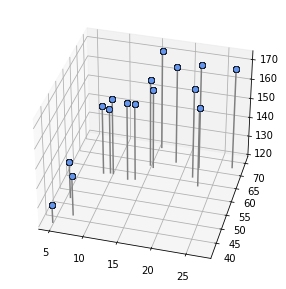

In [13]:
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]], [120, t[i]], color='gray')
        ax.plot(x0, x1, t, 'o', color='cornflowerblue', markeredgecolor='black', markersize=6, markeredgewidth=0.5)
        ax.view_init(elev=35, azim=-75)
        
plt.figure(figsize=(6, 5))
ax = plt.subplot(1,1,1,projection='3d')
show_data2(ax, X0, X1, T)
plt.show()

MSE = 165.789, SD=12.876cm


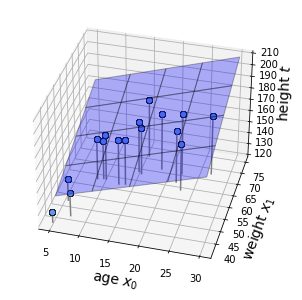

In [14]:
def show_plane(ax, w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0] * px0 + w[1] * px1 +w[2]
    ax.plot_surface(px0, px1, y, rstride = 1, cstride = 1, alpha = 0.3, color='blue', edgecolor='black')
    
def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 +w[2]
    mse = np.mean((y-t) ** 2)
    return mse

plt.figure(figsize=(6, 5))
ax=plt.subplot(1,1,1,projection='3d')

W=[1.5, 1, 90]
show_plane(ax, W)
show_data2(ax, X0, X1, T)
ax.set_xlabel('age $x_0$', fontsize = 14)
ax.set_ylabel('weight $x_1$', fontsize = 14)
ax.set_zlabel('height $t$', fontsize = 14)
mse = mse_plane(X0, X1, T, W)

print("MSE = {0:.3f}, SD={1:.3f}cm".format(mse, np.sqrt(mse)))
plt.show()

MSE =  6.480, SD =  2.546cm


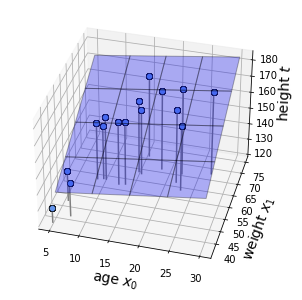

In [15]:
# 리스트 5-1-(16): 해석해
# 해석해
# w_0 = (cov(t,x_1)cov(x_0, x_1)-var(x_1)cov(t, x_0)) / (cov(x_0, x_1)^2  - var(x_0)var(x_1)
# w_1 = (cov(t,x_0)cov(x_0, x_1)-var(x_0)cov(t, x_1)) / (cov(x_0, x_1)^2  - var(x_0)var(x_1)
# w_2 = -w_0<x_0> - w_1<x_1> + <t>
# var(a) = <a^2> - <a>^2   : variance
# cov(a,b) = <ab> - <a><b>  : covariance

def fit_plane(x0, x1, t):
    c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0) # cov(t, x_0)
    c_tx1 = np.mean(t * x1) - np.mean(t) * np.mean(x1) # cov(t, x_1)
    c_x0x1 = np.mean(x0 * x1) - np.mean(x0) * np.mean(x1) # cov(x_0, x_1)
    v_x0 = np.var(x0) # var(x_0)
    v_x1 = np.var(x1) # var(x_1)
    w0 = (c_tx1 * c_x0x1 - v_x1 * c_tx0) / (c_x0x1 ** 2 - v_x0 * v_x1)
    w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1 ** 2 - v_x0 * v_x1)
    w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
    return np.array([w0, w1, w2])

# 메인
plt.figure(figsize = (6, 5))
ax = plt.subplot(1, 1, 1, projection = '3d')
W = fit_plane(X0, X1, T)
show_plane(ax, W)
show_data2(ax, X0, X1, T)
ax.set_xlabel('age $x_0$', fontsize = 14)
ax.set_ylabel('weight $x_1$', fontsize = 14)
ax.set_zlabel('height $t$', fontsize = 14)
mse = mse_plane(X0, X1, T, W)
print("MSE = {0: .3f}, SD = {1: .3f}cm" .format(mse, np.sqrt(mse)))
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

outfile = np.load('ch5_data.npz')
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']

In [17]:
def gauss(x, mu, s):
    return np.exp(-(x - mu) ** 2 / ( 2 *s **2))

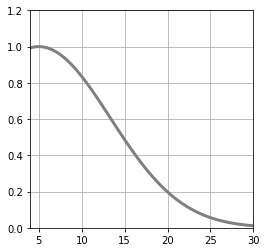

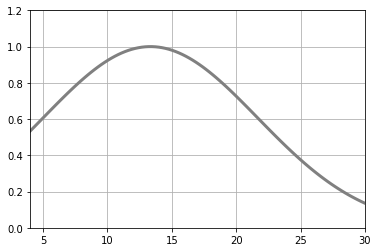

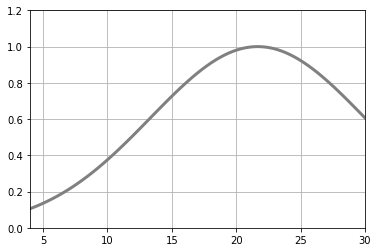

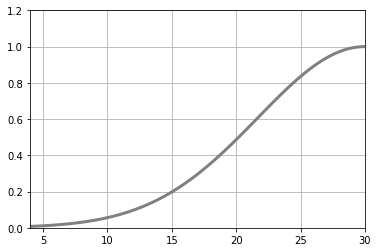

In [18]:
M = 4
plt.figure(figsize=(4, 4))
mu = np.linspace(5, 30, M)
s= mu[1] - mu[0]

xb = np.linspace(X_min, X_max, 100)

for j in range(M):
    y = gauss(xb, mu[j], s)
    plt.plot(xb, y, color='gray', linewidth=3)
    plt.grid(True)
    plt.xlim(X_min, X_max)
    plt.ylim(0, 1.2)
    plt.show()

In [19]:
def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x)
    
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
        
    y = y + w[m]
    return y

In [20]:
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y-t) ** 2)
    return mse

In [21]:
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n= x.shape[0]
    phi = np.ones((n, m+1))
    
    for j in range(m):
        phi[:, j] = gauss(x, mu[j], s)
        
    phi_T = np.transpose(phi)
    
    b = np.linalg.inv(phi_T.dot(phi))
    c = b.dot(phi_T)
    w = c.dot(t)
    
    return w

W= [29.4 75.7  2.9 98.3 54.9]
SD= 3.98 cm


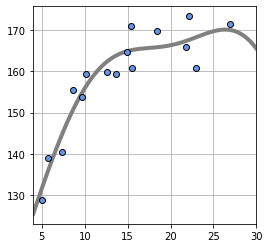

In [22]:
# 리스트 5-2-(7)
# 가우스 기저 함수 표시
def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4)
    
# 메인
plt.figure(figsize=(4, 4))
M = 4
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print("W=", np.round(W, 1))
print("SD={0: .2f} cm".format(np.sqrt(mse)))
plt.show()

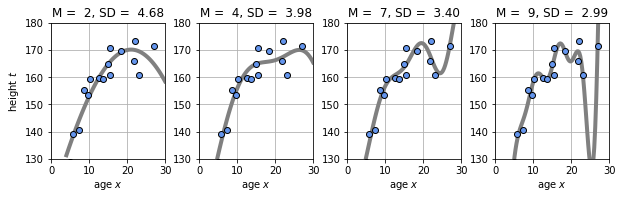

In [23]:
# 리스트 5-2-(8)
 # 기저함수의 수인 M 값을 2, 4, 7, 9 로 조정하여 출력한다
plt.figure(figsize = (10, 2.5))
plt.subplots_adjust(wspace = 0.3)
M = [2, 4, 7, 9]

for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    plt.plot(X, T, marker = 'o', linestyle = 'None', color = 'cornflowerblue', markeredgecolor = 'black')
    plt.xlim(0, X_max)
    plt.ylim(130, 180)
    plt.xlabel('age $x$')
    
    if i == 0:
            plt.ylabel('height $t$') 
    
    plt.grid(True)
    mse = mse_gauss_func(X, T, W)
    
    plt.title("M = {0: d}, SD = {1: .2f}" .format(M[i], np.sqrt(mse)))

plt.show()

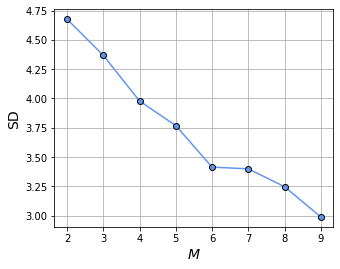

In [24]:
# 리스트 5-2-(9)
# SD(standard deviation)을 정량화 하여 그리는 예
# overfitting
plt.figure(figsize = (5, 4))
M = range(2, 10)
mse2 = np.zeros(len(M))

for i in range(len(M)):
    W = fit_gauss_func(X, T, M[i])
    mse2[i] = np.sqrt(mse_gauss_func(X, T, W))

plt.plot(M, mse2, marker = 'o', color = 'cornflowerblue', markeredgecolor = 'black')
plt.xlabel('$M$', fontsize = 14)
plt.ylabel('SD', fontsize = 14)
plt.grid(True)
plt.show()

X_test: (4,)
T_test: (4,)
X_train: (12,)
T_train: (12,)


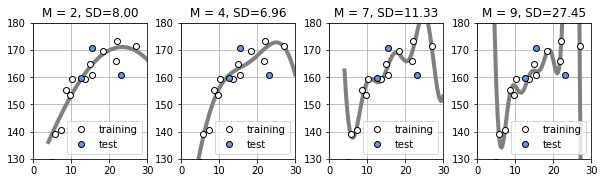

In [25]:
# 리스트 5-2-(10)
# Holdout 검증: 훈련 데이터로 사용하지 않은 데이터를 테스트 데이터로 사용하는 경우
# 훈련 데이터: 전체 데이터의 3/4, 테스트 데이터 1/4

# 훈련 데이터와 테스트 데이터 생성
X_test = X[ :int(X_n / 4)]
T_test = T[ :int(X_n / 4)]
X_train = X[int(X_n / 4): ]
T_train = T[int(X_n / 4): ]
print('X_test: ' + str(X_test.shape))
print('T_test: ' + str(T_test.shape))
print('X_train: ' + str(X_train.shape))
print('T_train: ' + str(T_train.shape))

# 메인
plt.figure(figsize = (10, 2.5))

plt.subplots_adjust(wspace = 0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X_train, T_train, M[i])
    show_gauss_func(W)
    plt.plot(X_train, T_train, marker = 'o', linestyle = 'None', color = 'white', markeredgecolor = 'black', label = 'training')
    plt.plot(X_test, T_test, marker = 'o', linestyle = 'None', color = 'cornflowerblue', markeredgecolor = 'black', label = 'test')
    plt.legend(loc = 'lower right', fontsize = 10, numpoints = 1)
    plt.xlim(0, X_max)
    plt.ylim(130, 180)
    plt.grid(True)
    mse = mse_gauss_func(X_test, T_test, W)
    plt.title("M = {0:d}, SD={1:.2f}" .format(M[i], np.sqrt(mse)))
plt.show()
    

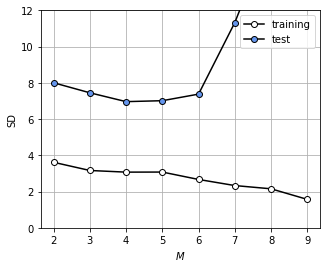

In [26]:
# 리스트 5-2-(11)
# M을 2부터 9까지 하나씩 이동하여 훈련 데이터와 테스트 데이터의  오차(SD) 를 그리기

plt.figure(figsize = (5, 4))
M = range(2, 10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M))

for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))
    
plt.plot(M, mse_train, marker = 'o', linestyle = '-', markerfacecolor = 'white', markeredgecolor = 'black', color = 'black', label = 'training')
plt.plot(M, mse_test, marker = 'o', linestyle = '-', markerfacecolor = 'cornflowerblue', markeredgecolor = 'black', color = 'black', label = 'test')
plt.legend(loc = 'upper right', fontsize = 10)
plt.ylim(0, 12)
plt.xlabel('$M$')
plt.ylabel('SD')
plt.grid(True)
plt.show()

# 홀드 아웃에 의한 선형 기저 함수 모델의 훈련 데이터, 테스트 데이터의 SD
# M이 늘어나면 훈련 데이터에 대한 오차(SD)가 줄어들지만 
# M이 5 이상에서는 과학습이 일어나고 있다. 테스트 데이터의 오차(SD)는 M=4 일 때 최소값을 취한다. 따라서 M=4가 최적이라고 할 수 있다

In [27]:
# 리스트 5-2-(12)
# K겹 교차 검증(K-hold cross-validation)

def kfold_gauss_func(x, t, m, k):
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]  
        x_test = x[np.fmod(range(n), k) == i]
        t_test = t[np.fmod(range(n), k) == i] 
        #(A) np.fmod(n, k) 는 n 을 k 로 나눈 나머지를 출력. 
        #    n을 range(n)으로 하면 0~k-1 까지를 반복하는 n개의 리스트를 얻을 수 있다
        wm = fit_gauss_func(x_train, t_train, m)
        mse_train[i] = mse_gauss_func(x_train, t_train, wm)
        mse_test[i] = mse_gauss_func(x_test, t_test, wm)
        
    return mse_train, mse_test


# 리스트 5-2-(14)
M = 4
K = 4
kfold_gauss_func(X, T, M, K)
# 첫번째 행: 각각의 분할에서 훈련 데이터의 평균제곱 오차
# 두번째 행: 테스트 데이터에서 평균제곱 오차

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782018,  18.30921743,  47.52459642]))

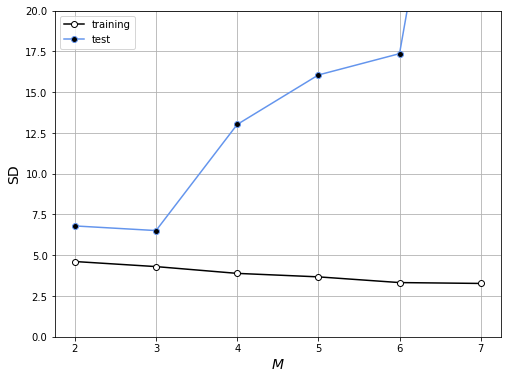

In [28]:
# 리스트 5-2-(15)
#분할 수를 최대의 16(LOOCV)으로 하고 2에서 7까지의 M으로 오차의 평균을 계산하고 그린다 
M = range(2, 8)
K = 16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))

for i in range(0, len(M)):
    Cv_Gauss_train[:, i], Cv_Gauss_test[:, i] = kfold_gauss_func(X, T, M[i], K)
    mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis = 0))
    mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis= 0))
    
    
plt.figure(figsize = (8, 6))
plt.plot(M, mean_Gauss_train, marker = 'o', linestyle = '-', color = 'k', markerfacecolor = 'w', label = 'training')
plt.plot(M, mean_Gauss_test, marker = 'o', linestyle = '-', color = 'cornflowerblue', markerfacecolor = 'black', label = 'test')
plt.legend(loc = 'upper left', fontsize = 10)
plt.xlabel('$M$', fontsize = 14)
plt.ylabel('SD', fontsize = 14)
plt.ylim(0, 20)
plt.grid(True)
plt.show()

# 선형 기저 함수 모델의 LOOCV
# 훈련 데이터에 대한 오차(SD)는 M이 증가하면 줄어든다
# M>3 에서 overfitting 시작 되고 있다. 테스트 데이터에 대한 오차(SD)는 M = 3일 때 최소치

SD= 4.37 cm


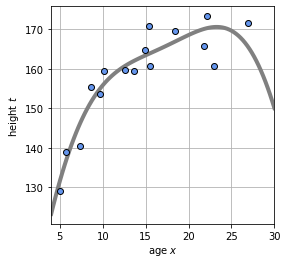

In [29]:
# 리스트 5-2-(16)
# 교차 검증을 통하여 얻은 M(=3)  이용하여 모델 매개 변수 w 를 구한다
M = 3
plt.figure(figsize = (4, 4))
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker = 'o', linestyle = 'none', color = 'cornflowerblue', markeredgecolor = 'black')
plt.xlim([X_min, X_max])
plt.xlabel('age $x$')
plt.ylabel('height $t$')
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print("SD= {0:.2f} cm" .format(np.sqrt(mse)))
plt.show()
# LOOCV 에서 얻은 M = 3의 선형 기저 함수 모델의 피팅

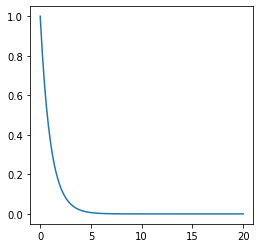

In [30]:
dataX = np.linspace(0, 20, 100)
dataY = np.exp(-dataX)

plt.figure(figsize=(4,4))
plt.plot(dataX, dataY)
plt.show()

In [31]:
def model_A(x, w):
    y = w[0] - w[1] * np.exp(-w[2]*x)
    return y

def show_model_A(w):
    xb = np.linspace(X_min, X_max, 100)
    y = model_A(xb, w)
    plt.plot(xb, y, c=[.5, .5, .5], lw= 4)
    
def mse_model_A(w, x, t):
    y = model_A(x, w)
    mse = np.mean((y-t)**2)
    return mse

In [32]:
from scipy.optimize import minimize

def fit_model_A(w_init, x, t):
    res1 = minimize(mse_model_A, w_init, args=(x,t), method = "powell")
    return res1.x

w0 = 169.040, w1 = 113.661, w2 = 0.217
SD = 3.86 cm


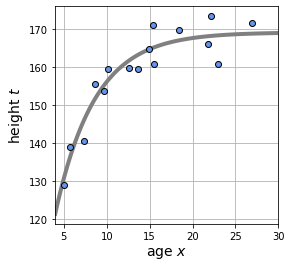

In [33]:
# 리스트 5-2-(19)
# 메인
plt.figure(figsize = (4, 4))
W_init = [100, 0, 0]
W = fit_model_A(W_init, X, T)
print("w0 = {0:.3f}, w1 = {1:.3f}, w2 = {2:.3f}" .format(W[0], W[1], W[2]))
show_model_A(W)
plt.plot(X, T, marker='o', linestyle='None', color = 'cornflowerblue', markeredgecolor = 'black')
plt.xlim(X_min, X_max)
plt.xlabel('age $x$', fontsize = 14)
plt.ylabel('height $t$', fontsize = 14)
plt.grid(True)
mse = mse_model_A(W, X, T)
print("SD = {0:.2f} cm" .format(np.sqrt(mse)))
plt.show()

[169.57773399 111.10832739   0.20910582]
Gauss(M=3): SD= 6.51 cm
Model A: SD= 4.72 cm


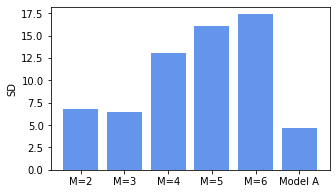

In [34]:
# 리스트 5-2-(20)
# 교차 검증 model_A
# 모델A의 LOOCV를 실시하여, 5.6의 선형 기저 함수 모델의 결과와 비교

def kfold_model_A(x, t, k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]  
        x_test = x[np.fmod(range(n), k) == i]
        t_test = t[np.fmod(range(n), k) == i] 
        wm = fit_model_A(np.array([169, 113, 0.2]), x_train, t_train)
        mse_train[i]  = mse_model_A(wm, x_train, t_train)
        mse_test[i]  = mse_model_A(wm, x_test, t_test)
    
    print(wm)
    return mse_train, mse_test

# 메인
K = 16 # LOOCV  를 위하여 K=N
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print("Gauss(M=3): SD={0: .2f} cm" .format(mean_Gauss_test[1]))
print("Model A: SD={0: .2f} cm" .format(mean_A_test))
SD = np.append(mean_Gauss_test[0:5], mean_A_test)
M = range(6)
label = ["M=2", "M=3", "M=4", "M=5", "M=6", "Model A" ]
plt.figure(figsize = (5, 3))
plt.bar(M, SD, tick_label = label, align = "center", facecolor = "cornflowerblue")
plt.ylabel('SD')
plt.show()
        

In [35]:
np.random.seed(seed=1)
X_min = 4
X_max = 30
X_n = 16
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2]
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) + 4 * np.random.randn(X_n)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)